**obsidiantools in 15 minutes**

# Libraries and config

In [1]:
# built-in libs
import os
from pathlib import Path

# obsidiantools requirements
import numpy as np
import pandas as pd
import networkx as nx

# extra libs for this notebook (visualise graph)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip show obsidiantools

Name: obsidiantools
Version: 0.10.0
Summary: Obsidian Tools - a Python interface for Obsidian.md vaults
Home-page: https://github.com/mfarragher/obsidiantools
Author: Mark Farragher
Author-email: 
License: BSD
Location: /home/mark/miniconda3/envs/obsidian/lib/python3.11/site-packages
Requires: beautifulsoup4, bleach, html2text, lxml, markdown, networkx, numpy, pandas, pymdown-extensions, python-frontmatter
Required-by: 


## Vault directory

In [3]:
VAULT_DIR = Path(os.getcwd()) / 'vault-stub'

In [4]:
VAULT_DIR.exists()

True

## Obsidian tools

In [5]:
import obsidiantools.api as otools  # api shorthand

# Canvas files

Use the `connect` method to get the info on your canvas files.

In [6]:
vault = otools.Vault(VAULT_DIR).connect()

obsidiantools has `Vault` attributes for canvas files.  The keys of these indices will always carry the `.canvas` file extension, to reflect how the links for canvas files appear in Obsidian.

These are the attributes for canvas files:
- `canvas_file_index`: index of canvas files where each value is a relative path to the file (the equivalent of `file_index` for canvas files)
- `canvas_content_index`: index of canvas files where each value is a Python dict that represents the JSON content of a canvas file.
- `canvas_graph_detail_index`: index of canvas files where each value is a tuple of information that can be used to recreate the layout of a canvas file in Obsidian.
    - The first item in the tuple is the graph itself.
    - The other two items contain the co-ordinates of nodes and the information about the graph edges.
    - See a recipe further down for how to visualise a canvas file.  It will not show the 'group' in the visualisation, but the nodes will be in the expected layout.

## Filepaths for canvas files

Get the filepaths of canvas files in the vault:

In [7]:
vault.canvas_file_index

{'Crazy wall 2.canvas': PosixPath('Crazy wall 2.canvas'),
 'Crazy wall.canvas': PosixPath('Crazy wall.canvas')}

## Content from canvas files

Get the content from the `Crazy wall 2.canvas` file:

In [8]:
vault.canvas_content_index.get('Crazy wall 2.canvas')

{'nodes': [{'id': '7ee7e59e29a5b091',
   'x': -125,
   'y': -30,
   'width': 250,
   'height': 60,
   'type': 'text',
   'text': "Now we're getting meta..."}],
 'edges': []}

## Represent canvas file in a graph

In [9]:
import matplotlib.pyplot as plt
# if using jupyter notebook:
%matplotlib inline

Function using `canvas_graph_detail_index`:

In [10]:
def plot_canvas_graph(vault, *, canvas_file, ax=None):
    """Note: canvas_file includes .canvas"""
    G, pos, edge_labels = vault.canvas_graph_detail_index.get(
        canvas_file)
    if ax is None:
        ax = plt.gca()
    fig = nx.draw(G, pos, with_labels=True, ax=ax)
    fig = nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(f'{canvas_file} graph')
    return fig

Plot graph for a file:

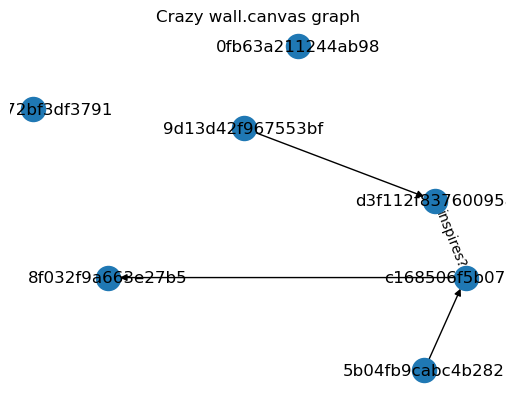

In [11]:
plot_canvas_graph(vault, canvas_file='Crazy wall.canvas')
plt.show()

![Obsidian graph](/img/demo-vault-canvas-graph-example.png?raw=true "Obsidian graph")